In [32]:
import cv2
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

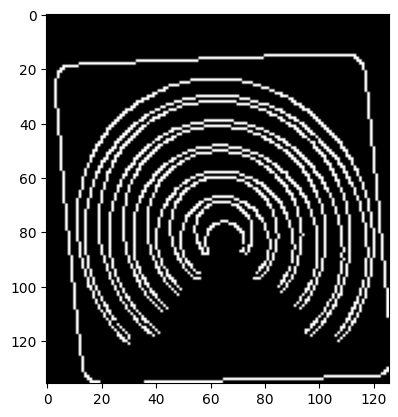

In [25]:
card_path_a = Path(r"/home/adlane/projets/twinit-dataset/cards/48/a.jpg")
card_image_a = cv2.imread(str(card_path_a), cv2.IMREAD_GRAYSCALE)
edges_a = cv2.Canny(card_image_a, 100, 200)
plt.imshow(edges_a, cmap="gray")


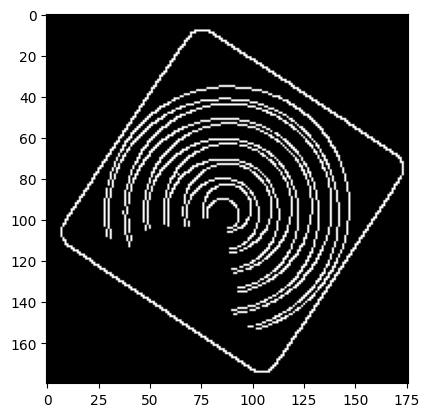

In [26]:
card_path_b = Path(r"/home/adlane/projets/twinit-dataset/cards/48/b.jpg")
card_image_b = cv2.imread(str(card_path_b), cv2.IMREAD_GRAYSCALE)
edges_b = cv2.Canny(card_image_b, 100, 200)
plt.imshow(edges_b, cmap="gray")

In [29]:
img1 = edges_a
img2 = edges_b

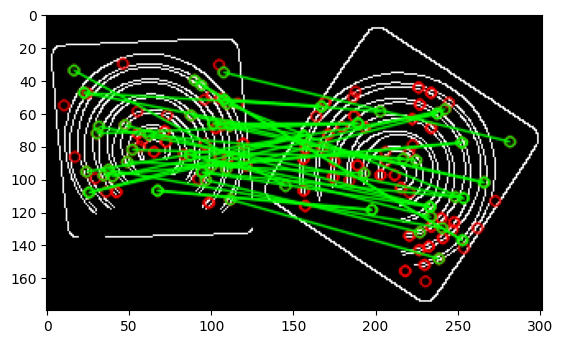

35


In [39]:
sift = cv2.SIFT_create()
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=2)
flann = cv2.FlannBasedMatcher(index_params, search_params)

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]
count = 0
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        count += 1
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.imshow(img3)
plt.show()
print(count)

In [33]:
lines_a = cv2.HoughLines(edges_a, 1, np.pi/180, 200)
